KitaLulus Technical Test (Data Analyst Intern)

Created by: Raynaldy Dwi Kharisma

#Part 1: SQL Test

In [ ]:
#Importing necessary libraries
import pandas as pd
import sqlite3
from sqlalchemy import create_engine, text

pd.set_option('display.max_columns', 1000)

In [ ]:
# Reading all the files
raw_path = 'olist/'
df_customers = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
df_geolocations = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
df_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
df_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
df_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
df_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
df_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
df_name_translation = pd.read_csv(raw_path + 'product_category_name_translation.csv')

In [ ]:
# Connect to the SQLite in-memory database (or file-based database)
engine = create_engine('sqlite://', echo=False)

# Dictionary of dataframes and their names
datasets = {
    'df_customers': df_customers,
    'df_geolocations': df_geolocations,
    'df_orders': df_orders,
    'df_order_items': df_order_items,
    'df_order_payments': df_order_payments,
    'df_order_reviews': df_order_reviews,
    'df_products': df_products,
    'df_sellers': df_sellers,
    'df_name_translation': df_name_translation
}

# Loop through the datasets and write each DataFrame to the database
for table_name, df in datasets.items():
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

In [ ]:
# Function to run a query returning pandas df
def run_query(query):
  with engine.connect() as connection:
    result = pd.read_sql_query(sql=text(query), con=connection)
    return result

## a. Number of orders per year and month

In [ ]:
query1 = """
SELECT
  STRFTIME('%Y', order_purchase_timestamp) AS order_year,
  STRFTIME('%m', order_purchase_timestamp) AS order_month,
  COUNT(order_id) AS order_count
FROM df_orders
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

In [ ]:
order_by_month = run_query(query1)
order_by_month

,order_year,order_month,order_count
0,2016,09,4
1,2016,10,324
2,2016,12,1
3,2017,01,800
4,2017,02,1780
5,2017,03,2682
6,2017,04,2404
7,2017,05,3700
8,2017,06,3245
9,2017,07,4026


In [ ]:
query2 = """
SELECT
  STRFTIME('%Y', order_purchase_timestamp) AS order_year,
  COUNT(order_id) AS order_count
FROM df_orders
GROUP BY order_year
ORDER BY order_year;
"""

In [ ]:
order_by_year = run_query(query2)
order_by_year

,order_year,order_count
0,2016,329
1,2017,45101
2,2018,54011


##b. Top 20 product categories based on total revenue and total order (only for delivered orders)

In [ ]:
query3 = """
SELECT
  p.product_category_name,
  SUM(oi.price) AS total_revenue,
  COUNT(oi.order_id) AS total_order
FROM df_products p
JOIN df_order_items oi ON p.product_id=oi.product_id
JOIN df_orders o ON oi.order_id=o.order_id
WHERE o.order_status='delivered'
GROUP BY p.product_category_name
ORDER BY total_revenue DESC, total_order DESC
LIMIT 20;
"""

In [ ]:
top_20_product = run_query(query3)
top_20_product

,product_category_name,total_revenue,total_order
0,beleza_saude,1233131.72,9465
1,relogios_presentes,1166176.98,5859
2,cama_mesa_banho,1023434.76,10953
3,esporte_lazer,954852.55,8431
4,informatica_acessorios,888724.61,7644
5,moveis_decoracao,711927.69,8160
6,utilidades_domesticas,615628.69,6795
7,cool_stuff,610204.10,3718
8,automotivo,578966.65,4140
9,brinquedos,471286.48,4030


##c. Number of orders which are delivered late from the estimated time per year and month

In [ ]:
query4 = """
SELECT
  STRFTIME('%Y', o.order_purchase_timestamp) AS order_year,
  STRFTIME('%m', o.order_purchase_timestamp) AS order_month,
  COUNT(o.order_id) AS order_count
FROM df_orders o
JOIN df_order_items oi ON o.order_id=oi.order_id
WHERE o.order_delivered_customer_date > o.order_estimated_delivery_date
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

In [ ]:
late_deliveries = run_query(query4)
late_deliveries

,order_year,order_month,order_count
0,2016,09,3
1,2016,10,3
2,2017,01,26
3,2017,02,62
4,2017,03,163
5,2017,04,193
6,2017,05,151
7,2017,06,131
8,2017,07,160
9,2017,08,151


##d. Top 3 customers per year and per month based on total spending

In [ ]:
query5 = """
WITH CustomerYearlySpending AS (
  SELECT
    STRFTIME('%Y', o.order_purchase_timestamp) AS order_year,
    c.customer_id,
    SUM(op.payment_value) AS total_spending
  FROM df_orders o
  JOIN df_order_payments op ON o.order_id = op.order_id
  JOIN df_customers c ON o.customer_id = c.customer_id
  GROUP BY order_year, c.customer_id
),
RankedCustomerSpending AS (
  SELECT
    order_year,
    customer_id,
    total_spending,
    ROW_NUMBER() OVER (PARTITION BY order_year ORDER BY total_spending DESC) AS rank_within_year
  FROM CustomerYearlySpending
)
SELECT
  order_year,
  customer_id,
  total_spending
FROM RankedCustomerSpending
WHERE rank_within_year <= 3
ORDER BY order_year, total_spending DESC;
"""
top_3_customers_yearly = run_query(query5)
top_3_customers_yearly


,order_year,customer_id,total_spending
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74
2,2016,4a06381959b6670756de02e07b83815f,1227.78
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44


In [ ]:
query6 = """
WITH CustomerMonthlySpending AS (
  SELECT
    STRFTIME('%Y', o.order_purchase_timestamp) AS order_year,
    STRFTIME('%m', o.order_purchase_timestamp) AS order_month,
    c.customer_id,
    SUM(op.payment_value) AS total_spending
  FROM df_orders o
  JOIN df_order_payments op ON o.order_id = op.order_id
  JOIN df_customers c ON o.customer_id = c.customer_id
  GROUP BY order_year, order_month, c.customer_id
),
RankedCustomerSpending AS (
  SELECT
    order_year,
    order_month,
    customer_id,
    total_spending,
    ROW_NUMBER() OVER (PARTITION BY order_year, order_month ORDER BY total_spending DESC) AS rank_within_month
  FROM CustomerMonthlySpending
)
SELECT
  order_year,
  order_month,
  customer_id,
  total_spending
FROM RankedCustomerSpending
WHERE rank_within_month <= 3
ORDER BY order_year, order_month, total_spending DESC;
"""
top_3_customers_monthly = run_query(query5)
top_3_customers_monthly


,order_year,order_month,customer_id,total_spending
0,2016,09,08c5351a6aca1c1589a38f244edeee9d,136.23
1,2016,09,683c54fc24d40ee9f8a6fc179fd9856c,75.06
2,2016,09,622e13439d6b5a0b486c435618b2679e,40.95
3,2016,10,a9dc96b027d1252bbac0a9b72d837fc6,1423.55
4,2016,10,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74
...,...,...,...,...
68,2018,09,6ddc45ad08e6a2c885ca2255fc52d6df,414.04
69,2018,09,fea4d57ed3a45455f89c25ef3dae8ee8,258.67
70,2018,10,856336203359aa6a61bf3826f7d84c49,222.03
71,2018,10,4c2ec60c29d10c34bd49cb88aa85cfc4,197.55


#Part 2: Case Study

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Overview

In [237]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [239]:
df.shape

(541909, 8)

In [240]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Description,1454
CustomerID,135080


In [241]:
df.duplicated().sum()

5268

In [242]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Points:
1. Dataset contains 541909 rows and 8 columns
2. The dataset has some missing values & duplicate values need to be dealt with.
3. The dataset with invoice starting with 'C' needs to be cleaned because it indicates cancelation.
4. Dataset has some negative value in Quantity and UnitPrice.
5. There are some outliers as seen in the table above, but we need to look deeper to be sure.

##Data Cleaning

### a. Missing values

In [243]:
print('Before removing missing values:', df.shape)
df.dropna(inplace=True)
print('After removing missing values:', df.shape)

Before removing missing values: (541909, 8)
After removing missing values: (406829, 8)


In [244]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


###b. Duplicate values

In [245]:
print('Before removing duplicate values:', df.shape)
df.drop_duplicates(inplace=True)
print('After removing duplicate values:', df.shape)

Before removing duplicate values: (406829, 8)
After removing duplicate values: (401604, 8)


In [246]:
df.duplicated().sum()

0

### c. Canceled orders

In [247]:
print('Number of canceled orders:', df['InvoiceNo'].str.startswith('C').sum())
print('Before removing canceled orders:', df.shape)
df = df[~df['InvoiceNo'].str.contains('C',na=False)]
print('After removing canceled orders:', df.shape)

Number of canceled orders: 8872
Before removing canceled orders: (401604, 8)
After removing canceled orders: (392732, 8)


### d. Negative values

In [248]:
print('Number of negative values in Quantity:', (df['Quantity'] < 0).sum())
print('Number of negative values in UnitPrice:', (df['UnitPrice'] < 0).sum())

Number of negative values in Quantity: 0
Number of negative values in UnitPrice: 0


### e. Outliers

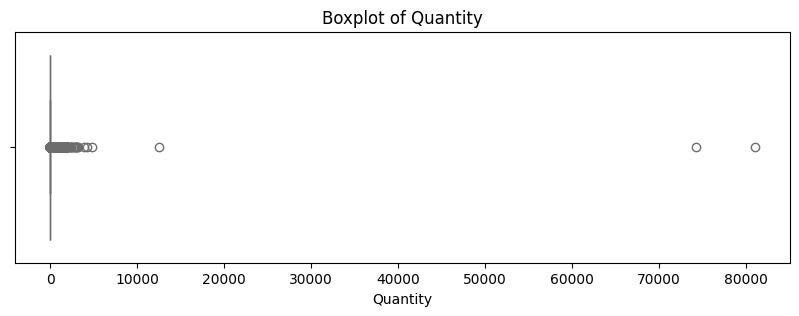

In [249]:
plt.figure(figsize=(10, 3))
plt.title('Boxplot of Quantity')
sns.boxplot(data=df, x='Quantity', color='Salmon')
plt.show()

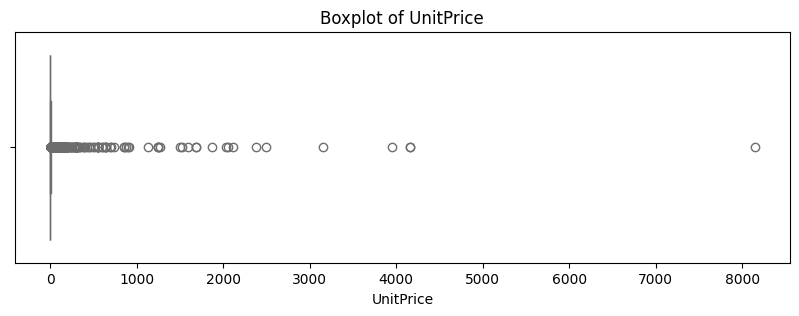

In [250]:
plt.figure(figsize=(10, 3))
plt.title('Boxplot of UnitPrice')
sns.boxplot(data=df, x='UnitPrice', color='Salmon')
plt.show()

We don't know if the outliers is a real data or incorrect data, so we just leave it for now.

## Objectives

There are 5 objectives that I want to achieve for now, these are:
1. Sales seasonal pattern
2. Most/least valuable customers
3. How to strategize these different customer segments
4. Most/least selling products
5. Products that are often purchased together

### 1. Sales seasonal pattern

In [251]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
# df['Day'] = df['InvoiceDate'].dt.day_name()

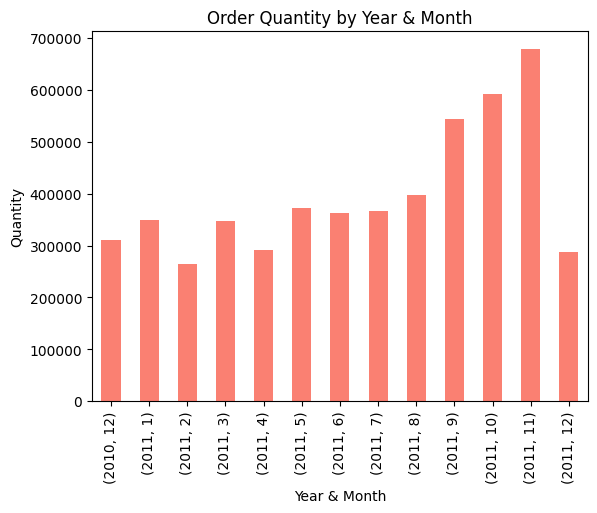

In [252]:
quantity_by_year_month = df.groupby(['Year', 'Month'])['Quantity'].sum()
plt.title('Order Quantity by Year & Month')
quantity_by_year_month.plot(kind='bar', color='Salmon')
plt.ylabel('Quantity')
plt.xlabel('Year & Month')
plt.show()

Looking at the plot above, we can see a spike in order quantity throughout Sept-Nov 2011. I believe it's an indication of a successful Christmas market campaign.

In [253]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

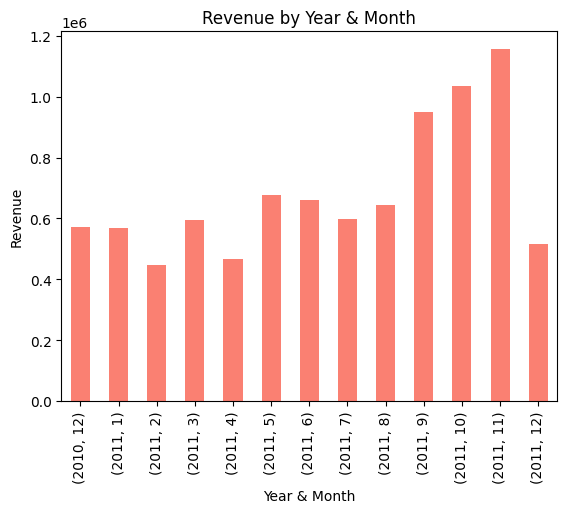

In [254]:
revenue_by_year_month = df.groupby(['Year', 'Month'])['Revenue'].sum()
plt.title('Revenue by Year & Month')
revenue_by_year_month.plot(kind='bar', color='Salmon')
plt.ylabel('Revenue')
plt.xlabel('Year & Month')
plt.show()

Looking at the revenue, it's quite the same as the order quantity, to be expected.

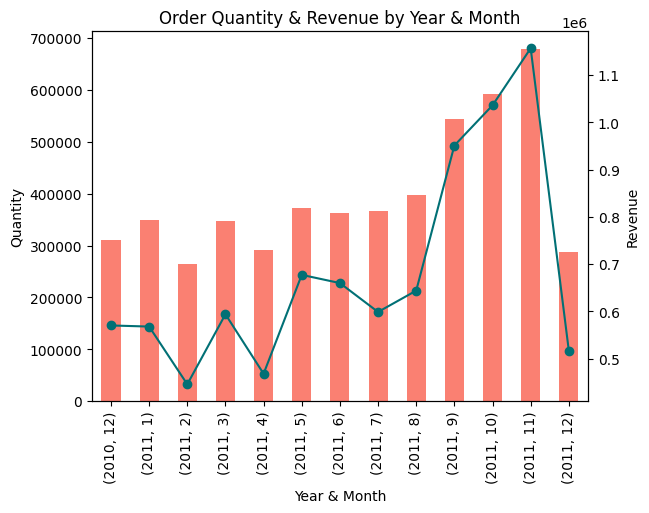

In [256]:
fig, ax1 = plt.subplots()

plt.title('Order Quantity & Revenue by Year & Month')

ax1 = quantity_by_year_month.plot(kind='bar', color='Salmon')
ax1.set_xlabel('Year & Month')
ax1.set_ylabel('Quantity')

ax2 = ax1.twinx()
revenue_by_year_month.plot(kind='line', color='#017075', marker='o')
ax2.set_ylabel('Revenue')

plt.show()

### 2. Most/Least valuable customers

In order to get the most and the least valuable customers. We will use RFM Analysis.

In [303]:
import datetime as dt

# Create a snapshot date
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Aggregate data
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [268]:
def plot_hist(dataframe, x, bins):
  plt.title(f'Histogram of {x}')
  sns.histplot(data=dataframe, x=x, color='Salmon', bins=bins)
  plt.show()

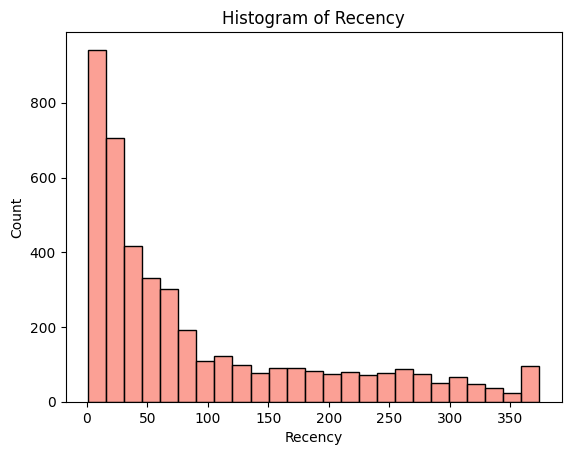

In [269]:
plot_hist(rfm_df, 'Recency', 25)

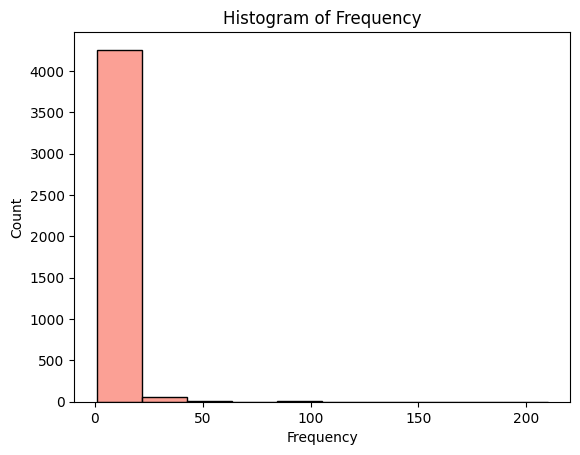

In [271]:
plot_hist(rfm_df, 'Frequency', 10)

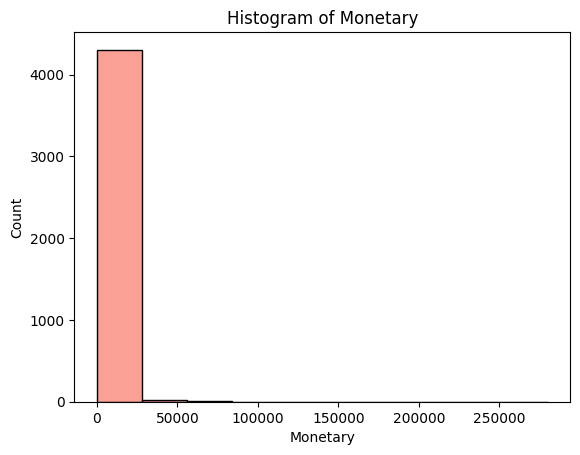

In [281]:
plot_hist(rfm_df, 'Monetary', 10)

In [283]:
def plot_box(dataframe, x):
  plt.title(f'Boxplot of {x}')
  sns.boxplot(data=dataframe, x=x, color='Salmon')
  plt.show()

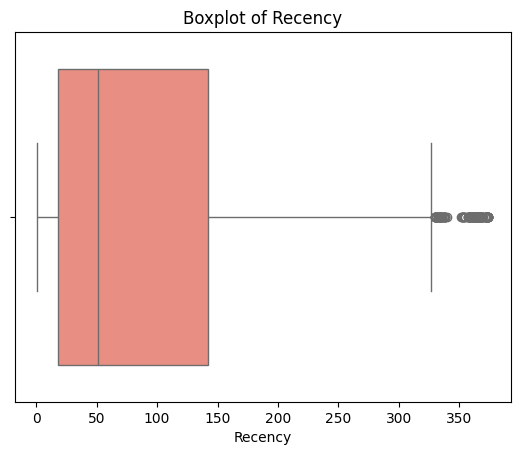

In [284]:
plot_box(rfm_df, 'Recency')

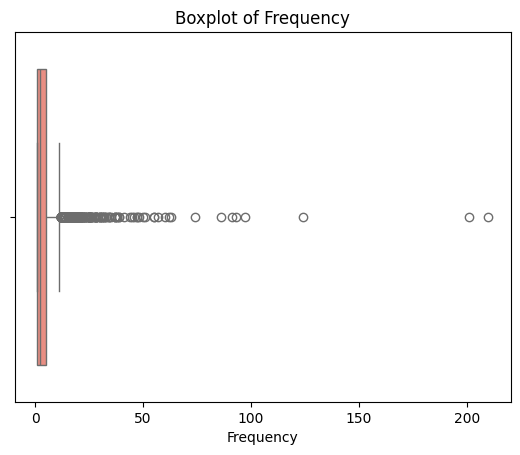

In [285]:
plot_box(rfm_df, 'Frequency')

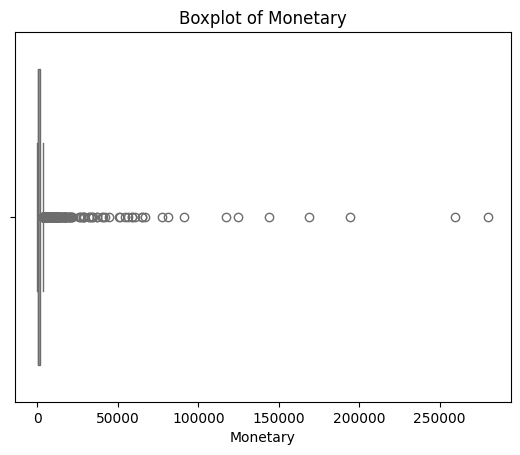

In [286]:
plot_box(rfm_df, 'Monetary')

Looking at the box plot above, we can confidently say that customers that have frequency > 100 or monetary > 100.000 are a VIP, if the data correct and not faulty.

In [306]:
# Perform RFM segmentation
def rfm_segmentation(data):
    # Segment Recency
    data['R'] = pd.qcut(data['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

    # Segment Frequency
    data['F'] = pd.qcut(data['Frequency'].rank(method='first'), [0, .25, .5, .75, .99, 1], labels=[1, 2, 3, 4, 5], duplicates='drop')

    # Segment Monetary
    data['M'] = pd.qcut(data['Monetary'], [0, 0.25, 0.5, 0.75, 0.995, 1], labels=[1, 2, 3, 4, 5], duplicates='drop')

    # Calculate RFM Score
    data['RFM_Score'] = data['R'].astype(str) + data['F'].astype(str) + data['M'].astype(str)

    return data

I use [0, .25, .5, .75, .99, 1] and [0, 0.25, 0.5, 0.75, 0.995, 1] to cut the data, to cover the outliers.

In [307]:
rfm = rfm_segmentation(rfm_df)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,4,4,544
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,19,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112


The rules are:
- 555 are VIP
- 4 in F/M are already really good, this is a loyal customer bracket.
- 544 are the loyalist, we need to maintain customers in this bracket.
- 5 in F/M even if they have a score of 1 in R are still good potential to strategize.

In [328]:
def segment_customer(data):
  segment = []
  for score in data['RFM_Score']:
    if score == '555':
      segment.append('VIP')
    elif score[0] in ['1', '2'] and (score[1] == '5' or score[2] == '5'):
      segment.append('Potential Big Spender')
    elif score[0] == '5' or score[1] == '5' or score[2] == '5':
      segment.append('Tier-1 Customer')
    elif score[0] == '4' or score[1] == '4' or score[2] == '4':
      segment.append('Tier-2 Customer')
    elif score[0] == '3' or score[1] == '3' or score[2] == '3':
      segment.append('Basic Customer')
    elif score[0] == '2' or score[1] == '2' or score[2] == '2':
      segment.append('Low-Value Customer')
    else:
      segment.append('At Risk')
  data['Segment'] = segment
  return data

In [329]:
rfm = segment_customer(rfm_df)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Potential Big Spender
1,12347.0,2,7,4310.00,5,4,4,544,Tier-1 Customer
2,12348.0,75,4,1797.24,2,3,4,234,Tier-2 Customer
3,12349.0,19,1,1757.55,4,1,4,414,Tier-2 Customer
4,12350.0,310,1,334.40,1,1,2,112,Low-Value Customer


In [339]:
import plotly.express as px

segment_counts = rfm.groupby('Segment')['CustomerID'].count().sort_values(ascending=False)

fig = px.bar(
    segment_counts,
    x=segment_counts.index,
    y='CustomerID',
    title='Number of Customers per Segment',
    labels={'CustomerID': 'Number of Customers', 'Segment': 'Customer Segment'},
    color_discrete_sequence=['salmon']
)

fig.show()


Customer Characteristics:
1. VIP (12 Customers)
  - High lifetime value and loyalty
  - Frequent and significant purchases
  - Receives special privileges, exclusive offers, and personalized service

2. Potential Big Spender (3 Customers)
  - Likely to become a VIP with further nurturing and incentives
  - Shows interest in premium products or services

3. Tier-1 Customer (861 Customers)
  - Regular spender with moderate to high transaction value
  - Growing loyalty and engagement
  - Likely to become a VIP with further nurturing and incentives

4. Tier-2 Customer (1323 Customers)
  - Occasional spender with moderate to mid-low transaction value
  - Purchases less frequently than Tier-1
  - Lower level of brand loyalty, but could increase with the right incentives

5. Basic Customer (1094 Customers)
  - Irregular spender with low transaction value
  - Engages only with entry-level products or discounted items
  - Low likelihood of upgrading to higher tiers without targeted campaigns

6. Low-Value Customer (785 Customers)
  - Minimal spending, often on low-priced items
  - Little to no brand loyalty, and at risk of churn
  - Does not contribute significantly to revenue

7. At Risk (261 Customers)
  - Previous customer but has decreased or stopped purchases altogether
  - Needs targeted win-back campaigns to re-engage

- Our strategy should focus on maintaining Tier-1 & Tier-2 customer to ensure revenue streams.
- We also need targeted marketing and campaigns for VIPs & potential big spenders.
- For basic customers & low-value customers, maybe we give a personalized discount on items on their wishlist.
- For customers at risk we need to make a targeted win-back customers campaign.

### 4. Most/Least Selling Products

In [344]:
# Calculate total revenue for each product
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

In [345]:
# Most selling products (top 10)
most_selling_products = product_revenue.head(10)
print("Most Selling Products (Top 10):")
print(most_selling_products)

Most Selling Products (Top 10):
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64


In [346]:
# Least selling products (bottom 10)
least_selling_products = product_revenue.tail(10)
print("\nLeast Selling Products (Bottom 10):")
print(least_selling_products)


Least Selling Products (Bottom 10):
Description
PACK 4 FLOWER/BUTTERFLY PATCHES        1.250
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
CAT WITH SUNGLASSES BLANK CARD         0.950
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
VINTAGE BLUE TINSEL REEL               0.840
SET 12 COLOURING PENCILS DOILEY        0.650
HEN HOUSE W CHICK IN NEST              0.420
PADS TO MATCH ALL CUSHIONS             0.003
Name: Revenue, dtype: float64


### 5. Products Often Bought Together

In [348]:
from itertools import combinations

# Create a list of lists, where each inner list contains the products purchased in a single order
order_products = df.groupby('InvoiceNo')['Description'].apply(list).tolist()

# Create a dictionary to store product pairs and their frequency
product_pairs = {}

for order in order_products:
  if len(order) > 1:
    for pair in combinations(order, 2):
      pair = tuple(sorted(pair))  # Sort the pair to ensure (A, B) is the same as (B, A)
      if pair in product_pairs:
        product_pairs[pair] += 1
      else:
        product_pairs[pair] = 1

# Sort the product pairs by frequency in descending order
sorted_product_pairs = dict(sorted(product_pairs.items(), key=lambda item: item[1], reverse=True))

# Print the top 10 most frequently bought together products
print("Top 10 Products Often Bought Together:")
for i, (pair, frequency) in enumerate(sorted_product_pairs.items()):
  if i < 10:
    print(f"{pair}: {frequency} times")


Top 10 Products Often Bought Together:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 575 times
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 557 times
('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '): 549 times
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 547 times
('LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT'): 545 times
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG PINK POLKADOT'): 488 times
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN '): 476 times
("PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'): 476 times
('GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM '): 475 times
('WOODEN FRAME ANTIQUE WHITE ', 'WOODEN PICTURE FRAME WHITE FINISH'): 474 times


We can create a recommendation algorithm to sell items that are often bought together, something like 'Other customer also bought these'.